In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [115]:
df_employee=pd.read_csv("empl.csv")
df_employee

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [116]:
df_employee.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [117]:
col_to_impute=["Age","City"]
for col in col_to_impute:
    if df_employee[col].dtype!="object":
        df_employee[col].fillna(df_employee[col].mean(),inplace=True)
    else:
        df_employee[col].fillna(df_employee[col].mode()[0],inplace=True)

In [118]:
df_employee.isnull().sum()

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     3
dtype: int64

In [119]:
df_slry_grpby_city=df_employee.groupby(["City"]).agg({"Salary":"mean"})

In [120]:
for index in df_slry_grpby_city.index:
    df_employee.loc[df_employee["City"]==index,["Salary"]]=df_employee.loc[df_employee["City"]==index,["Salary"]].fillna(df_slry_grpby_city.loc[index])

In [121]:
df_employee.isnull().sum()

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     1
dtype: int64

In [122]:
df_employee["Salary"].fillna(df_employee["Salary"].mean(),inplace=True)

In [123]:

df_employee.isnull().sum()

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     0
dtype: int64

In [124]:
df_employee.drop(columns=["SNo","Name"],inplace=True)

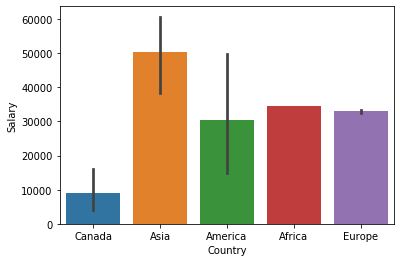

In [125]:
sns.barplot(x="Country",y="Salary",data=df_employee)
plt.show()

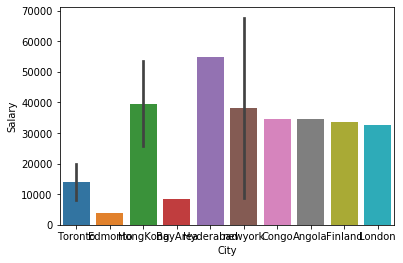

In [126]:
sns.barplot(x="City",y="Salary",data=df_employee)
plt.show()

In [128]:
df_employee_final=pd.get_dummies(df_employee,drop_first=True)

In [129]:
df_x=df_employee_final.drop(columns=["Salary"])
y=df_employee_final[["Salary"]]

In [130]:
df_x=df_employee_final.drop(columns=["Salary"])
y=df_employee_final[["Salary"]]

In [131]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [132]:

regr=DecisionTreeRegressor()
final_r_state=maxr2_score(regr,df_x,y)

r2 score corresponding to  42  is  -0.9533300738730945
r2 score corresponding to  43  is  -2.3043580617239914
r2 score corresponding to  44  is  -1.1572553740729572
r2 score corresponding to  45  is  -3.7839000674192045
r2 score corresponding to  46  is  0.19232737038335357
r2 score corresponding to  47  is  -1.779917798271856
r2 score corresponding to  48  is  -1.440961410189265
r2 score corresponding to  49  is  -0.46990773417855003
r2 score corresponding to  50  is  -0.8212699245236095
r2 score corresponding to  51  is  -0.7717126126962035
r2 score corresponding to  52  is  -0.8342557634585281
r2 score corresponding to  53  is  -1.5220760115343883
r2 score corresponding to  54  is  -0.9208429566137215
r2 score corresponding to  55  is  -1.1196455663371916
r2 score corresponding to  56  is  -0.9461993346045086
r2 score corresponding to  57  is  -1.0848585756392128
r2 score corresponding to  58  is  -2.6675365872696353
r2 score corresponding to  59  is  -0.39141724900439123
r2 score c

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [134]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(2,10)}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 2}

In [137]:
knr=KNeighborsRegressor(n_neighbors=8)
final_r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  -0.14819121019914938
r2 score corresponding to  43  is  -0.21894598740869142
r2 score corresponding to  44  is  -0.11781813015596465
r2 score corresponding to  45  is  -2.5582779563097064
r2 score corresponding to  46  is  -0.0975123393807118
r2 score corresponding to  47  is  -0.1915202405747527
r2 score corresponding to  48  is  -0.12981544528194489
r2 score corresponding to  49  is  -0.09727187591028041
r2 score corresponding to  50  is  -0.05253118363895859
r2 score corresponding to  51  is  -0.6580116974459331
r2 score corresponding to  52  is  -0.2843168249453518
r2 score corresponding to  53  is  0.037826547531370824
r2 score corresponding to  54  is  -0.3797020901693784
r2 score corresponding to  55  is  0.0975158833631925
r2 score corresponding to  56  is  -0.14444113958716498
r2 score corresponding to  57  is  -0.4554088212689664
r2 score corresponding to  58  is  -1.1870083807787033
r2 score corresponding to  59  is  -0.10315058058506121
r2

In [138]:

from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,df_x,y)

r2 score corresponding to  42  is  -1.2990752682236306
r2 score corresponding to  43  is  -2.5251157783446074
r2 score corresponding to  44  is  -0.19901982710279675
r2 score corresponding to  45  is  -4.22465993818632
r2 score corresponding to  46  is  -0.2601971970935397
r2 score corresponding to  47  is  -1.5996768708618756
r2 score corresponding to  48  is  0.21227352395906085
r2 score corresponding to  49  is  -0.024606121762307254
r2 score corresponding to  50  is  0.189473573704934
r2 score corresponding to  51  is  0.01746691293235747
r2 score corresponding to  52  is  -0.3799242544743271
r2 score corresponding to  53  is  -2.155008778997593
r2 score corresponding to  54  is  -0.47876289621228874
r2 score corresponding to  55  is  -2.4680480512167553
r2 score corresponding to  56  is  -0.9124613605311358
r2 score corresponding to  57  is  -1.6891238955252437
r2 score corresponding to  58  is  -4.075734733827603
r2 score corresponding to  59  is  -0.6752568719014447
r2 score cor

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 55,test_size=0.20)

In [140]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

max r2 score corresponding to  67  is  0.814226507934986


In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 56,test_size=0.20)
lnr=LinearRegression()
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_test)

In [144]:
from sklearn.externals import joblib 
   
joblib.dump(lnr, 'salary.pkl')

['salary.pkl']